In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt


# Gather


In [2]:
# load csv files, WeRateDogs Twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(1)# check dataframe loaded correctly

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
# download tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) #make request to get url

with open(url.split('/')[-1], mode = 'wb') as file: # slice the last part of the url to open
    file.write(response.content)

In [4]:
# read in the csv and make sure it was done correctly
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Gathering Twitter API

In [5]:
#create API object do gather Twitter data

consumer_key = '0PdfBU5Bo8Bfk2EfVAvoVn9x3'
consumer_secret = 'ejXAurShoJMtfz21HKfLrCgbccr8D2LpiU6ktcWq1NQNFCpWxT'
access_token = '1051157935785529344-6u6toHS2zBUd4PAlOEsN9JfqxsE0oP'
access_secret = 'ZVuUJTLxFPKGXbuK6Wakz55Kr9VRY2JXxhKuoOjY7hXzT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# gather tweets if it hasn't been done before
if not os.path.exists('tweet_json.txt'):
    tweet_info = {}
    tweet_info['tweets'] = []
    # get tweet information for each tweet id
    for tweet_id in (df_archive.tweet_id):
        # see where we're in the process
        # because it can take a while
        try:
            tweet = api.get_status(id = tweet_id)
            tweet_info['tweets'].append({
                "tweet_id": int(tweet_id),
                "retweet_count": int(tweet.retweet_count),
                "favourite_count": int(tweet.favorite_count),
            })
        # record the tweets that can't be found
        except:
            print('{} tweet id doesn\'t exist anymore'.format(tweet_id))

    # save tweets as json object into a text file
    with open('tweet_json.txt', 'w') as outfile:
        json.dump(tweet_info, outfile)

In [7]:
# load json file and create dataframe
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
df_add_tweet_info = pd.DataFrame(data['tweets'])
df_add_tweet_info.head()

,favourite_count,retweet_count,tweet_id
0,38262,8378,892420643555336193
1,32798,6186,892177421306343426
2,24698,4092,891815181378084864
3,41586,8520,891689557279858688
4,39758,9229,891327558926688256


# Assess

In [8]:
# assess dataframes
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#check the differenent entries for name
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [12]:
#check row with name of 'officially' and 'by'
df_archive.query('name == "officially" or name == "by"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None


In [13]:
#check for duplicate entries
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
# check the numerators
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# groupby rating numerators that only appear once to check for numerators that are not similar to others
df_archive.groupby('rating_numerator').filter(lambda x: len(x) <= 2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [16]:
# check row with numerator of 26 and 960 for errors
df_archive.query('rating_numerator == 960 or rating_numerator == 26')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [17]:
# check entries for source
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
#check json dataframe
df_add_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favourite_count    2342 non-null int64
retweet_count      2342 non-null int64
tweet_id           2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [19]:
df_add_tweet_info.head()

,favourite_count,retweet_count,tweet_id
0,38262,8378,892420643555336193
1,32798,6186,892177421306343426
2,24698,4092,891815181378084864
3,41586,8520,891689557279858688
4,39758,9229,891327558926688256


In [20]:
df_add_tweet_info[df_add_tweet_info.tweet_id.duplicated()]

,favourite_count,retweet_count,tweet_id


In [21]:
df_add_tweet_info.describe()

,favourite_count,retweet_count,tweet_id
count,2342.000000,2342.000000,2.342000e+03
mean,8005.430401,2954.451324,7.422212e+17
std,12368.563039,4962.362186,6.832408e+16
min,0.000000,0.000000,6.660209e+17
25%,1384.250000,593.500000,6.783509e+17
50%,3487.000000,1379.500000,7.186224e+17
75%,9816.500000,3447.750000,7.986971e+17
max,165043.000000,84239.000000,8.924206e+17


In [22]:
#assess image predictions
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
df_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Quality
* Timestamp column needs to be converted from object to timestamp
* in_reply  columns need to be converted from float to string
* Tweet_id column in df_archive needs to be converted to str
* Tweet_id column in df_predictions needs to be converted to str
* tweet_id column in df_add_tweet_info needs to be converted to str
* Name column has many entries as 'a'
* Name column nulls represented as 'None'.
* Columns doggo, floofer, pupper, puppos have nulls represented as 'None'.
* Tweet_id 835246439529840000 has invalid rating of 960/0, change to 13/10
* Tweet_id 680494726643068929 has an actual rating of 11.26 but has it entered as 26
* Tweet_id 679111216690831360 has name entered as 'officially' by mistake
* Tweet_id 680085611152338944 has name entered as 'by' by mistake
* Source column for df_archive in html, convert to string for plain english

### Tidyness

* df_archive contains rows that are not original tweets. e.g. retweets.
* df_archvie contains columns that are not original tweets
* Column doggo, pupper, floofer, puppo should be variable in one column

# Clean

In [25]:
df_archive_copy = df_archive # make copy of dataset

1.Delete rows that are not origianal tweets such as retweets.

### Define
* query the data for all the non-null values in the retweet_status_id column and delete them.

### Code

In [26]:
# delete all non-null rows in in_reply_to column and retweet column
df_archive_copy= df_archive_copy[df_archive_copy.retweeted_status_id.isnull()]

### Test

In [27]:
#check if any non-null values
df_archive_copy[df_archive_copy.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


df_archvie contains columns that are not original tweets such as retweets.  


### Define
* use drop() method to remove columns 'retweeded_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'

### Code

In [28]:
df_archive_copy = df_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

### Test

In [29]:
#check to see that columns were deleted
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


* Columns doggo, floofer, pupper, puppos have nulls represented as 'None'.
* Name column nulls represented as 'None'.

### Define
* combine mask with dropna  for rows in doggo, floofer, pupper, puppo, and name columns where 'None' is the entry and drop

In [30]:
#replace 'None' with null value
df_archive_copy['doggo'] = df_archive_copy['doggo'].mask(df_archive_copy['doggo'].eq('None')).dropna()
df_archive_copy['floofer'] = df_archive_copy['floofer'].mask(df_archive_copy['floofer'].eq('None')).dropna()
df_archive_copy['pupper'] = df_archive_copy['pupper'].mask(df_archive_copy['pupper'].eq('None')).dropna()
df_archive_copy['puppo'] = df_archive_copy['puppo'].mask(df_archive_copy['puppo'].eq('None')).dropna()
df_archive_copy['name'] = df_archive_copy['name'].mask(df_archive_copy['name'].eq('None')).dropna()

In [31]:
#Check to see that the columns now have null values
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


Column doggo, pupper, floofer, puppo should be variable in one column.  

### Define
* use melt function to combine variables in to one column

#### Steps:
1. Combine the 4 columns using the melt() method.
2. Drop the duplicates.
3. Merge the observations with multiple dog stages
4. Drop any duplicates that remain.

### Code

#### Step 1
* Combine the 4 columns using the melt() method.


In [32]:
#melt pupper, puppo, floofer, and doggo into one variable under column name 
# dog_stage

df_archive_copy = pd.melt(df_archive_copy, 
                id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                        'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']
                         , value_name = 'dog_stage')



In [33]:
#delete the 'variable' column as it is not needed
df_archive_copy = df_archive_copy.drop(['variable'], axis = 1)

In [34]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 11 columns):
tweet_id                 8700 non-null int64
in_reply_to_status_id    312 non-null float64
in_reply_to_user_id      312 non-null float64
timestamp                8700 non-null object
source                   8700 non-null object
text                     8700 non-null object
expanded_urls            8468 non-null object
rating_numerator         8700 non-null int64
rating_denominator       8700 non-null int64
name                     5980 non-null object
dog_stage                356 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 747.7+ KB


#### Step 2:
* Drop the duplicates.


In [35]:
# delte the duplicates

df_archive_copy = df_archive_copy.drop_duplicates()

In [36]:
#check to see that duplicates have been dropped.
df_archive_copy.shape

(2531, 11)

In [37]:
# check tweet_id with three entries. Dog stage has multiple stages including
# a null value
df_archive_copy.loc[df_archive_copy['tweet_id']==817777686764523521]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
382,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo
2557,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,NaN
4732,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,pupper


In [38]:
# query data for rows that are non-null in dogstage and append the tweet_id to list
to_drop = df_archive_copy.loc[df_archive_copy['dog_stage'].notnull(), 'tweet_id'].tolist()

In [39]:
# drop rows where tweet_id is in to_drop and has a null-value in dog_stage

df_archive_copy = df_archive_copy.drop(df_archive_copy.loc[(df_archive_copy['tweet_id'].isin(to_drop)) & 
                                                        (df_archive_copy['dog_stage'].isnull())].index)

In [40]:
# check to see that rows of duplicates with null values have been dropped
df_archive_copy.loc[df_archive_copy['tweet_id']==817777686764523521]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
382,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo
4732,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,pupper


#### Step 3.
* Merge the observations with multiple dog stages


In [41]:
#create dictionary for tweet_id's correlated with multiple dog stages
multiple_DogStage = df_archive_copy.loc[df_archive_copy['tweet_id'].duplicated(keep=False)].groupby('tweet_id').groups

In [42]:
# iterate through dictionary and combine both keys into one the column dog stage
for key in multiple_DogStage.keys():
    ind4 = multiple_DogStage[key][0]
    ind5 = multiple_DogStage[key][1]
    df_archive_copy.loc[ind4,'dog_stage']='{},{}'.format(df_archive_copy.loc[ind4,'dog_stage'],df_archive_copy.loc[ind5,'dog_stage'])

In [43]:
# check to see that tweet_id's with multiple dog stages have been merged
df_archive_copy[df_archive_copy['tweet_id']==817777686764523521]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
382,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,"doggo,pupper"
4732,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,pupper


#### Step 4.
* Drop the remainng duplicates

In [44]:
# check for remaining duplicates
df_archive_copy.loc[df_archive_copy['tweet_id'].duplicated(keep=False)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
165,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,"doggo,puppo"
172,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,"doggo,floofer"
382,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,"doggo,pupper"
442,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,"doggo,pupper"
467,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,"doggo,pupper"
474,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,"doggo,pupper"
567,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,"doggo,pupper"
593,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,NaN,"doggo,pupper"
722,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,"doggo,pupper"
781,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,"doggo,pupper"


In [45]:
# drop remaining duplicates
df_archive_copy = df_archive_copy.drop_duplicates('tweet_id')

### Test

In [46]:
# check to see that duplicates were dropped
df_archive_copy.shape

(2175, 11)

In [47]:
# check to see that this tweet_id only has one entry and the dog stage has been merged
df_archive_copy[df_archive_copy['tweet_id']==817777686764523521]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
382,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,"doggo,pupper"


Timestamp column in df_archive needs to be converted from object to datetime

### Define
* Convert column from object to datetime

### Code

In [48]:
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])

### Test

In [49]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 7430
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
dog_stage                344 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


In [50]:
df_archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


Columns in df_archive data frame need to be converted to string:
* reply to status id 
* in reply to user id
* tweet id

Columns in df_predictions and df_add_tweet_info needs to be converted to string:
* Tweet id 

### Define
* convert the columns above using .apply(str)

### Code

In [51]:
# make copies of dataframes
df_predictions_copy = df_predictions
df_add_tweet_info_copy = df_add_tweet_info

In [52]:
# use series .where to only convert non-null values
df_archive_copy['in_reply_to_status_id'] = df_archive_copy['in_reply_to_status_id'].where(df_archive_copy['in_reply_to_status_id'].isnull(), df_archive.in_reply_to_status_id.astype(str))
df_archive_copy['in_reply_to_user_id'] = df_archive_copy['in_reply_to_user_id'].where(df_archive_copy['in_reply_to_user_id'].isnull(), df_archive.in_reply_to_status_id.astype(str))


In [53]:
# convert columns to string

df_archive_copy['tweet_id'] = df_archive_copy['tweet_id'].apply(str)
df_predictions_copy['tweet_id'] = df_predictions_copy['tweet_id'].apply(str)
df_add_tweet_info_copy['tweet_id'] = df_add_tweet_info_copy['tweet_id'].apply(str)


### Test

In [54]:
# check dataframe
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 7430
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    74 non-null object
in_reply_to_user_id      74 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
dog_stage                344 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 283.9+ KB


In [55]:
df_add_tweet_info_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favourite_count    2342 non-null int64
retweet_count      2342 non-null int64
tweet_id           2342 non-null object
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [56]:
df_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Name column in df_archive has many entries as 'a'

### Define
* replace 'a' with null-value

### Code

In [57]:
len(df_archive_copy[df_archive_copy['name'] == 'a'])


55

In [58]:
df_archive_copy['name'] = df_archive_copy['name'].mask(df_archive_copy['name'].eq('a')).dropna()

### Test

In [59]:
len(df_archive_copy[df_archive_copy['name'] == 'a'])


0

In [60]:
# check that rows were not deleted and only changed to null values
df_archive_copy.shape

(2175, 11)

Some ratings have decimals and were incorrectly input in the rating column

### Define
find ratings that have decimals in the text column.  Enter the correct decimal number into the rating column

### Code

In [61]:
df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
42,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN
1510,681340665377193984,nan,nan,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5,10,NaN,NaN
1533,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN
4967,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper


In [62]:
# Change datatype of rating_numerator and denominator to float
df_archive_copy['rating_numerator'] = df_archive_copy['rating_numerator'].astype('float')
df_archive_copy['rating_denominator'] = df_archive_copy['rating_denominator'].astype('float')

In [63]:
# change rating numerator
df_archive_copy.loc[(df_archive_copy['tweet_id'] == 883482846933004288) & (df_archive_copy['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_archive_copy.loc[(df_archive_copy['tweet_id'] == 786709082849828864) & (df_archive_copy['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_archive_copy.loc[(df_archive_copy['tweet_id'] == 778027034220126208) & (df_archive_copy['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_archive_copy.loc[(df_archive_copy['tweet_id'] == 680494726643068929) & (df_archive_copy['rating_numerator'] == 26), ['rating_numerator']] = 11.26

### Test

In [64]:
#check that the numerators have been changed
df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
42,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,NaN
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,NaN
1510,681340665377193984,nan,nan,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,5.0,10.0,NaN,NaN
1533,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,NaN,NaN
4967,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,pupper


Delete rows wtih no images

### Define
delete rows with null values in expanded_url section

In [65]:
sum(df_archive_copy['expanded_urls'].isnull())


58

In [66]:
df_archive_copy = df_archive_copy.dropna(subset = ['expanded_urls'])

### Test

In [67]:
sum(df_archive_copy['expanded_urls'].isnull())


0

Merge all the dataframes into one

In [68]:
df_add_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favourite_count    2342 non-null int64
retweet_count      2342 non-null int64
tweet_id           2342 non-null object
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [69]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
Add df_add_tweet_info and df_predictions into df_archive_copy

In [70]:
df_archive_copy = pd.merge(left = df_archive_copy, right = df_add_tweet_info, left_on = 'tweet_id',
                          right_on = 'tweet_id', how = 'inner')

In [71]:
df_archive_copy = df_archive_copy.merge(df_predictions, on = 'tweet_id', how = 'inner')

In [72]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null object
in_reply_to_status_id    21 non-null object
in_reply_to_user_id      21 non-null object
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1392 non-null object
dog_stage                306 non-null object
favourite_count          1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf           

# Storing, Analyzing, and Visualizing

In [73]:
# store master dataframe
df_archive_copy.to_csv('twitter_archive_master.csv', index=False)

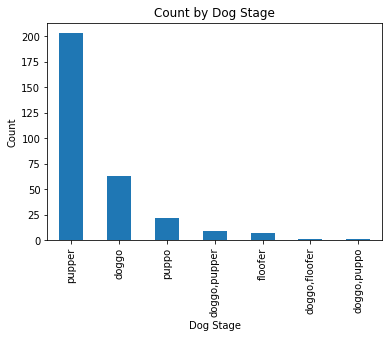

In [82]:
# visualize the count of different dog stages
df_archive_copy['dog_stage'].value_counts().plot(kind = 'bar');
plt.title('Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.show()


Pupper is by far the most popular dog stage.  Although this is a very small sample size as compared to the amount of missing data for dog stage.

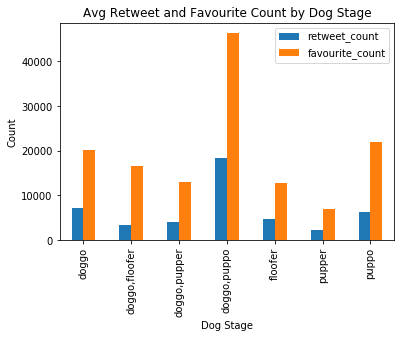

In [75]:
# visualize the avereage retweet and favourite count
df_archive_copy.groupby('dog_stage')['retweet_count', 'favourite_count'].mean().plot(kind = 'bar');
plt.title('Avg Retweet and Favourite Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.show()

In [76]:
# group tweets by day of the week to see what days saw the most tweets

df_archive_copy.groupby(df_archive_copy['timestamp'].dt.weekday_name).agg(['median','count'])


rating_numerator       rating_denominator       favourite_count  \
                    median count             median count          median   
timestamp                                                                   
Friday                11.0   282               10.0   282          4156.5   
Monday                11.0   327               10.0   327          3888.0   
Saturday              11.0   252               10.0   252          3681.5   
Sunday                11.0   256               10.0   256          3571.5   
Thursday              11.0   284               10.0   284          3902.0   
Tuesday               11.0   295               10.0   295          4345.0   
Wednesday             11.0   297               10.0   297          4074.0   

                retweet_count       img_num        ...  p1_dog        \
          count        median count  median count  ...  median count   
timestamp                                          ...                 
Friday      282        1362.0   282       1   282  ...    True   282   
Monday      327        1238.0   327       1   327  ...    True   327   
Saturday    252        1119.0   252       1   252  ...    True   252   
Sunday      256        1229.5   256       1   256  ...    True   256   
Thursday    284        1303.5   284       1   284  ...    True   284   
Tuesday     295        1377.0   295       1   295  ...    True   295   
Wednesday   297        1331.0   297       1   297  ...    True   297   

            p2_conf       p2_dog         p3_conf       p3_dog        
             median count median count    median count median count  
timestamp                                                            
Friday     0.126922   282   True   282  0.049726   282   True   282  
Monday     0.113672   327   True   327  0.061005   327   True   327  
Saturday   0.109009   252   True   252  0.050258   252   True   252  
Sunday     0.114490   256   True   256  0.045973   256   True   256  
Thursday   0.126022   284   True   284  0.051205   284   True   284  
Tuesday    0.120530   295   True   295  0.052665   295   True   295  
Wednesday  0.114071   297   True   297  0.043786   297   True   297  

[7 rows x 22 columns]

Monday saw the highest retweet and favourite counts.  Saturday saw the least.

In [77]:
# make second copy of dataframe for visualizations

df_archive_copy2 = df_archive_copy
df_archive_copy2.set_index('timestamp', inplace = True)

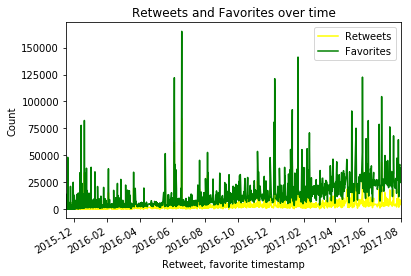

In [78]:
#plot favorites and retweets over time
df_archive_copy2['retweet_count'].plot(color = 'yellow', label='Retweets')
df_archive_copy2['favourite_count'].plot(color = 'green', label='Favorites')
plt.legend()
plt.xlabel('Retweet, favorite timestamp')
plt.ylabel('Count')
plt.title('Retweets and Favorites over time')
plt.show()

The amount of retweets and favorites steadily increased over time.

In [79]:
#check max retweet and favourite count
df_archive_copy.loc[:,['retweet_count', 'favourite_count']].max()

retweet_count       84239
favourite_count    165043
dtype: int64

In [80]:
df_archive_copy[df_archive_copy['retweet_count'] == 84239]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


The most retweeted post was of a dog that learned to stand in a pool with a rating of 13/10

In [81]:
df_archive_copy[df_archive_copy['favourite_count'] == 165043]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


The most favorited post was the same as the most retweeted.